In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [20]:
df = pd.read_csv('./data/train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [21]:
df['Male'] = df['Gender'].apply(lambda x: True if x == 'Male' else False)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,True
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,True
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,True
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,True
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,False


In [22]:
df = df.drop(['Gender', 'id'], axis=1)

In [23]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: True if x == 'Yes' else False)

In [24]:
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 2 if x == '> 2 Years' else 1.5 if x=='1-2 Year' else 1)

In [25]:
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male
0,44,1,28.0,0,2.0,True,40454.0,26.0,217,1,True
1,76,1,3.0,0,1.5,False,33536.0,26.0,183,0,True
2,47,1,28.0,0,2.0,True,38294.0,26.0,27,1,True
3,21,1,11.0,1,1.0,False,28619.0,152.0,203,0,True
4,29,1,41.0,1,1.0,False,27496.0,152.0,39,0,False


In [26]:
train = df.iloc[:round((len(df)/10*9))]

In [27]:
test = df.iloc[:round((len(df)/10))]

In [28]:
features = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Male']

In [29]:
X_train = train[features]
X_train

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male
0,44,1,28.0,0,2.0,40454.0,26.0,217,True
1,76,1,3.0,0,1.5,33536.0,26.0,183,True
2,47,1,28.0,0,2.0,38294.0,26.0,27,True
3,21,1,11.0,1,1.0,28619.0,152.0,203,True
4,29,1,41.0,1,1.0,27496.0,152.0,39,False
...,...,...,...,...,...,...,...,...,...
342993,67,1,28.0,1,1.5,39962.0,26.0,154,True
342994,22,1,13.0,1,1.0,24967.0,152.0,69,True
342995,30,1,47.0,0,1.5,2630.0,16.0,83,True
342996,65,1,28.0,0,2.0,50508.0,124.0,214,True


(array([ 58472.,   5220.,  85915., 112525.,  51912.,  17977.,   6579.,
          2274.,    921.,    495.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

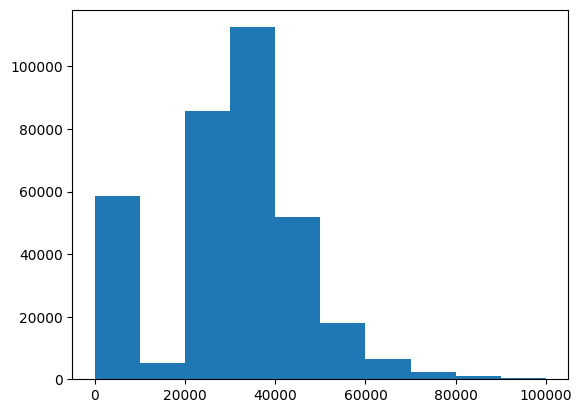

In [30]:
plt.hist(X_train['Annual_Premium'], range=(0,100000))

In [31]:
y_train = train['Response']
y_train

0         1
1         0
2         1
3         0
4         0
         ..
342993    0
342994    0
342995    0
342996    1
342997    0
Name: Response, Length: 342998, dtype: int64

In [32]:
X_test = test[features]

In [33]:
y_test = test['Response']

In [34]:
model = RandomForestClassifier(min_samples_leaf=2, )

In [35]:
model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2)

In [36]:
model.feature_importances_

array([0.14733948, 0.00037158, 0.10111719, 0.14463457, 0.03296962,
       0.23467641, 0.06972579, 0.253888  , 0.01527735])

In [37]:
feat_importance = pd.DataFrame([features, list(model.feature_importances_)])

In [38]:
feat_importance.transpose().sort_values(1, ascending=False)

,0,1
7,Vintage,0.253888
5,Annual_Premium,0.234676
0,Age,0.147339
3,Previously_Insured,0.144635
2,Region_Code,0.101117
6,Policy_Sales_Channel,0.069726
4,Vehicle_Age,0.03297
8,Male,0.015277
1,Driving_License,0.000372


In [39]:
model.score(X_test,y_test)

0.9544488467896408

In [40]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
model.decision_path(X_train)

(<342998x5125402 sparse matrix of type '<class 'numpy.int64'>'
 	with 648976942 stored elements in Compressed Sparse Row format>,
 array([      0,   52879,  103070,  154067,  205788,  257881,  310490,
         359673,  411710,  463355,  514398,  565605,  615678,  665527,
         714960,  766091,  818068,  871587,  923968,  974797, 1027276,
        1080435, 1131672, 1183393, 1231458, 1283259, 1333246, 1384049,
        1434002, 1485653, 1532902, 1584245, 1637258, 1685187, 1732704,
        1779415, 1829424, 1880517, 1932172, 1984245, 2036784, 2088295,
        2138036, 2188793, 2241342, 2292871, 2345204, 2394785, 2446358,
        2496017, 2548574, 2599893, 2651224, 2699885, 2750882, 2800295,
        2852026, 2902621, 2953488, 3006403, 3059572, 3111447, 3163498,
        3214947, 3267590, 3320273, 3369162, 3418935, 3468458, 3519161,
        3570082, 3621763, 3673080, 3726737, 3779438, 3831459, 3883136,
        3935377, 3985602, 4038629, 4089522, 4140503, 4193650, 4245917,
        4293560, 4

{'whiskers': [<matplotlib.lines.Line2D at 0x124e67770>,
 'caps': [<matplotlib.lines.Line2D at 0x124ed5b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x124ed53a0>],
 'medians': [<matplotlib.lines.Line2D at 0x124ed6030>],
 'fliers': [<matplotlib.lines.Line2D at 0x124ed6300>],
 'means': []}

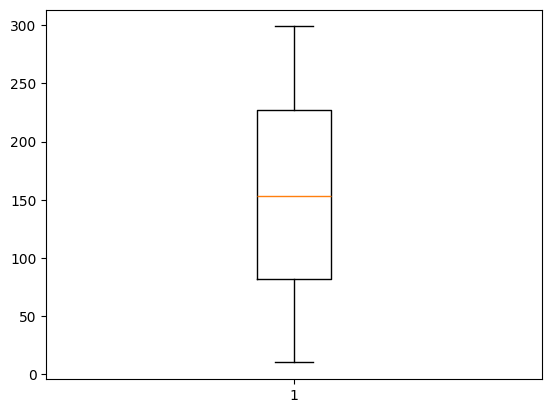

In [42]:
plt.boxplot(test['Vintage'])

In [43]:
(node_indicator, _) = model.decision_path(X_train)

In [44]:
node_indicator.data

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
len(test.loc[(test['Vintage'] > 10) & (test['Response'] == 1)])/len(test[test['Vintage'] > 150])

0.23794096472282217

In [46]:
no_license = df.loc[(df['Driving_License'] == 0)]


(array([128040.,  43931.,  37485.,  47888.,  46726.,  26652.,  22318.,
         14719.,  11397.,   1953.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

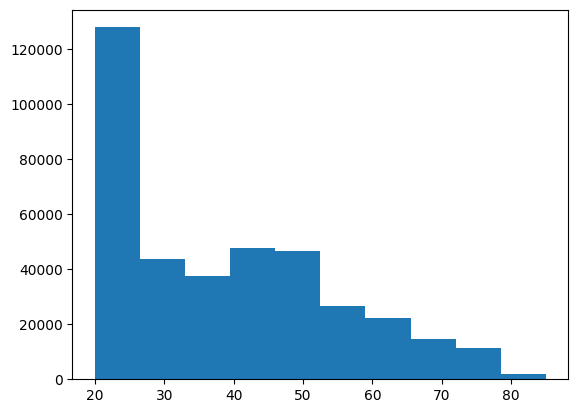

In [47]:
plt.hist(df['Age'])

(array([  2.,   2.,   7.,  44.,  53.,  95., 150., 219., 178.,  62.]),
 array([21. , 27.4, 33.8, 40.2, 46.6, 53. , 59.4, 65.8, 72.2, 78.6, 85. ]),
 <BarContainer object of 10 artists>)

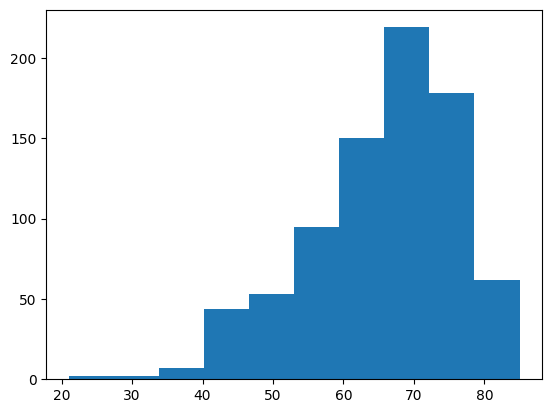

In [48]:
plt.hist(no_license['Age'])

In [49]:
df.loc[(df['Vehicle_Age'] != '< 1 Year') & (df['Vehicle_Age'] != '1-2 Year')]

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male
0,44,1,28.0,0,2.0,True,40454.0,26.0,217,1,True
1,76,1,3.0,0,1.5,False,33536.0,26.0,183,0,True
2,47,1,28.0,0,2.0,True,38294.0,26.0,27,1,True
3,21,1,11.0,1,1.0,False,28619.0,152.0,203,0,True
4,29,1,41.0,1,1.0,False,27496.0,152.0,39,0,False
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,1.5,False,30170.0,26.0,88,0,True
381105,30,1,37.0,1,1.0,False,40016.0,152.0,131,0,True
381106,21,1,30.0,1,1.0,False,35118.0,160.0,161,0,True
381107,68,1,14.0,0,2.0,True,44617.0,124.0,74,0,False


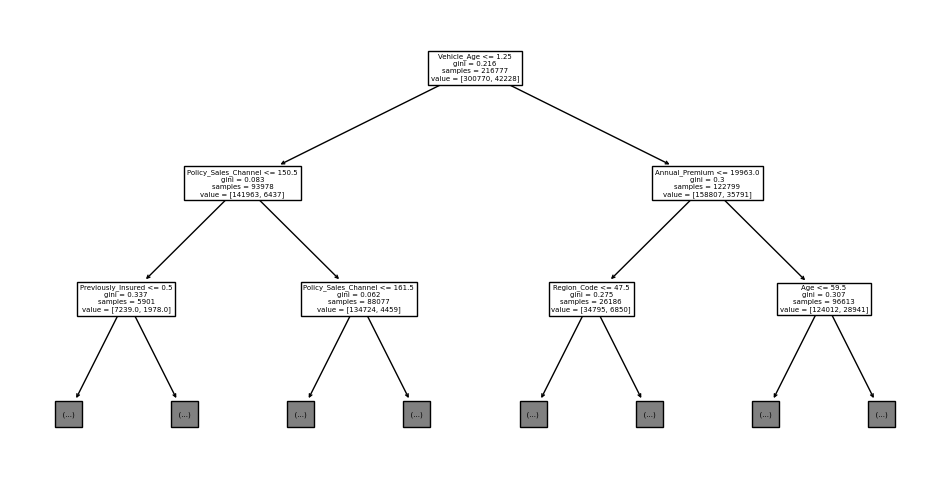

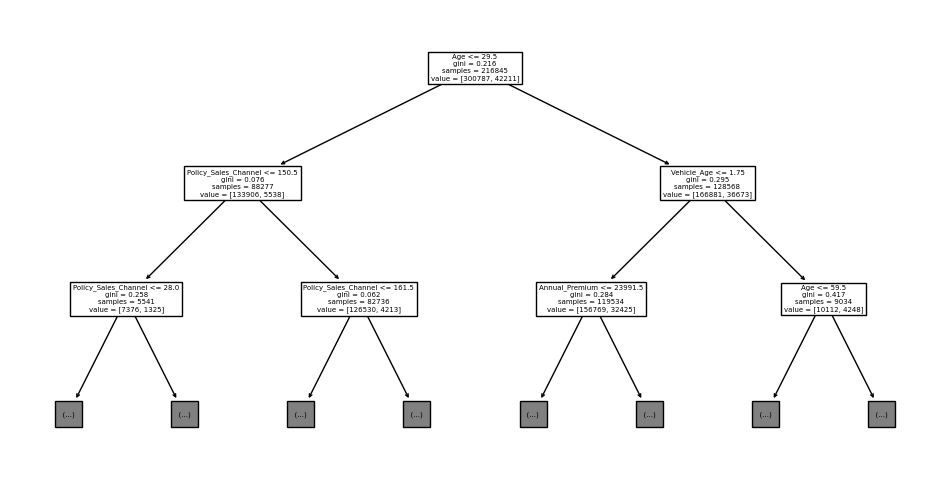

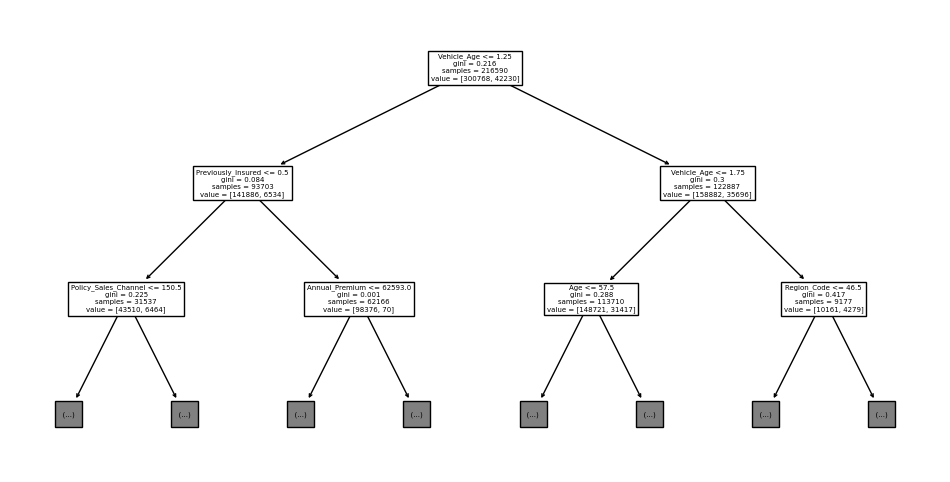

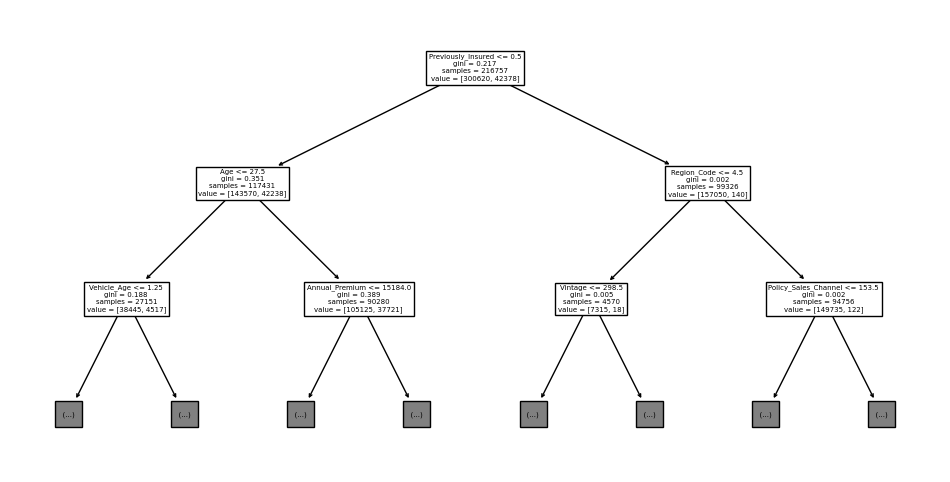

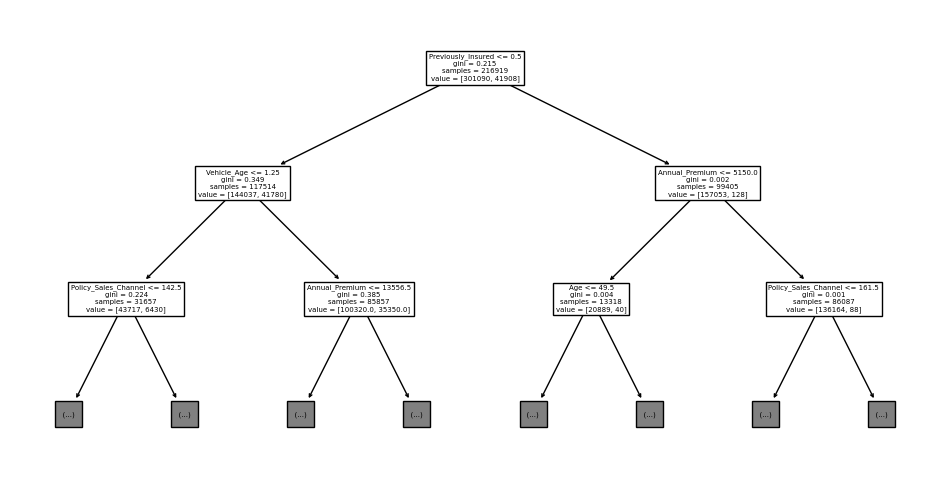

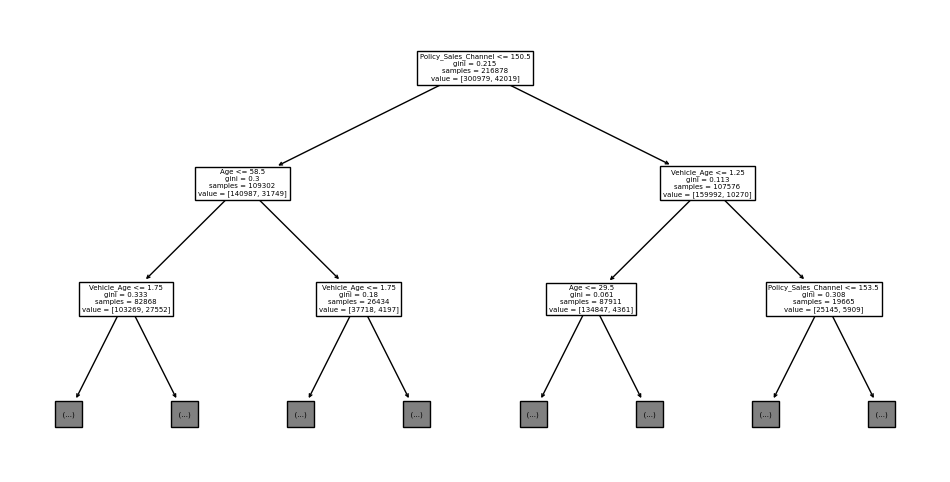

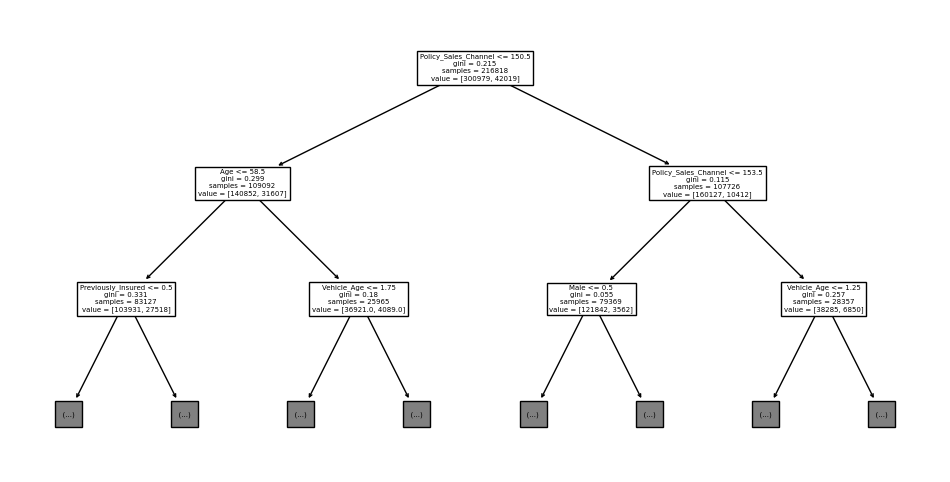

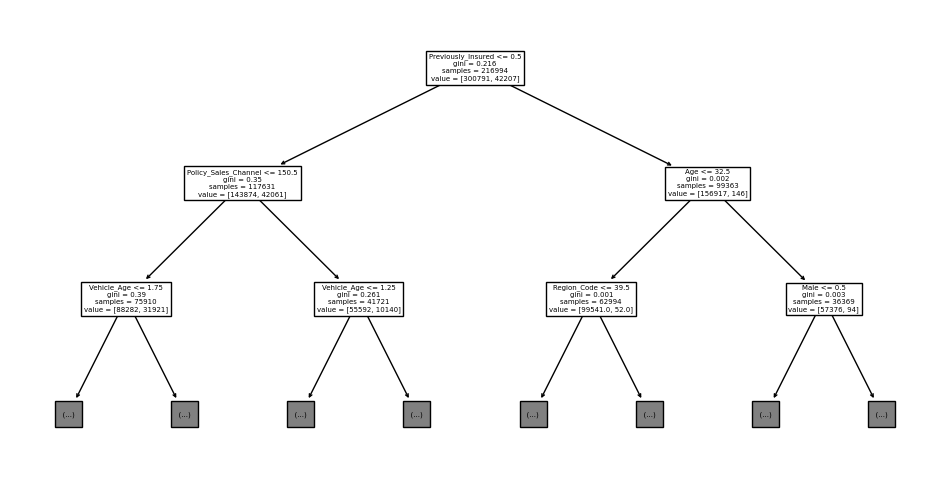

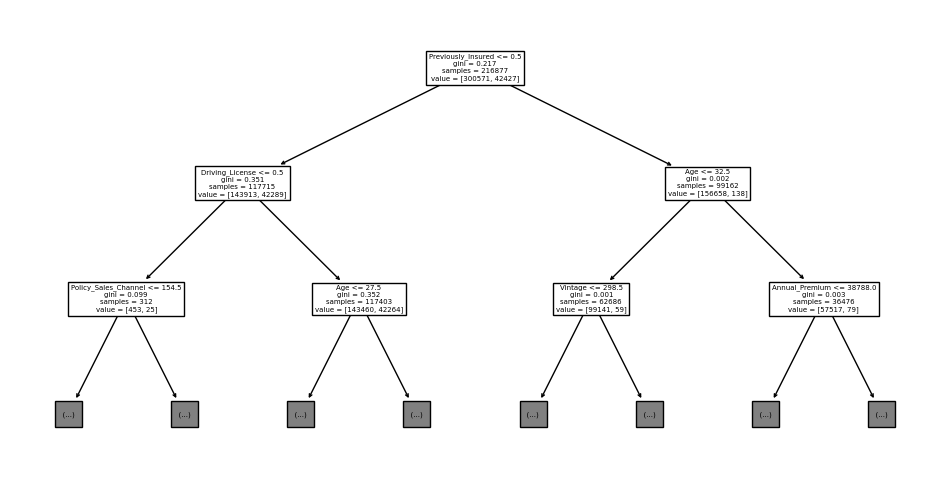

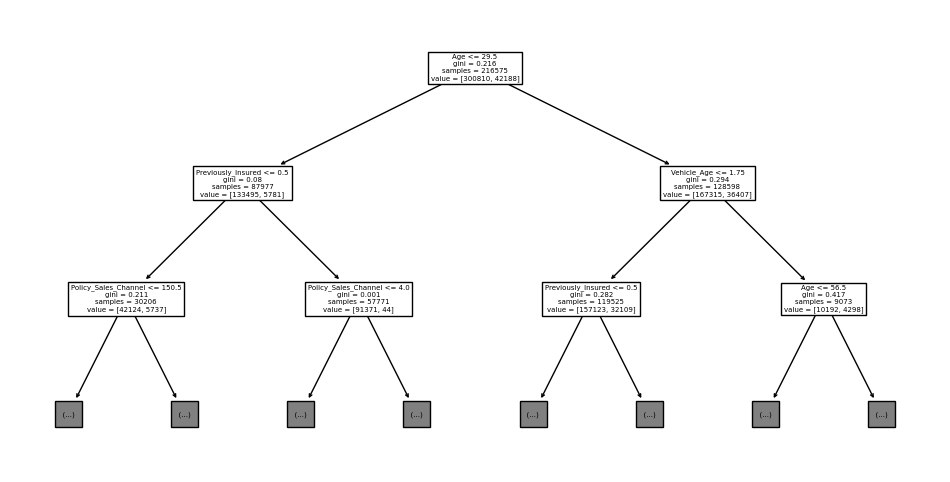

In [55]:
for i in range(10):
    tree = model.estimators_[i]
    plt.figure(figsize=(12,6))
    data = plot_tree(tree,
                           feature_names=features,
                           max_depth=2,)
    plt.show()